## Intermediate Data Science

#### University of Redlands - DATA 201
#### Jesus Plascencia 
#### October 3, 2026

In [2]:
# Some basic package imports
import os
import numpy as np
import pandas as pd
import kagglehub

# Visualization packages
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'
import seaborn as sns

/opt/anaconda3/lib/python3.12/site-packages/kaleido/_sync_server.py:11: UserWarning:




This means that static image generation (e.g. `fig.write_image()`) will not work.

Please upgrade Plotly to version 6.1.1 or greater, or downgrade Kaleido to version 0.2.1.




## Aggregation and Grouping - Day8 HW


### Get the data

Import the data that you find here:

(Video Game Sales)[https://www.kaggle.com/datasets/gregorut/videogamesales]

Start you assignment with a discussion of the data. Is there a license, how was it generated, what are the variables and units? Then do an analysis using the grouping functions we learned in class. Here are some ideas, but you are welcome to go off script.

1. Cross-tabulate the number of games across platforms and genres. Sort this to see which platforms have the most overall games. Then make a dataframe that contains the cross-tabulated results for just four Platforms that have the most overall games.
2. Focusing on the columns that contain sales data for EU,NA, and JP, create a table that shows the mean sales for of the the top for platforms. Make a plot of this data. (bar plot)
3. Again focusing on the columns that contain sales data, create a table that shows the mean sales for each genre. Make a plot of this data.
4. Create a table that shows the mean and max sales for each year and for each sales region (NA,EU,JP). From this data make a scatter or line plot that shows how the max sales data changed over the years.

Here are some examples of my ouputs

- images/CountsTop5.png
- images/GenreAverageSales.png
- images/MaxSalesperYear.png
- images/PlatformAverageSales.png

Your final notebooks should:

- [ ] Be a completely new notebook with just the Day6 stuff in it: Read in the data, make the plots. Make sure to discuss what you see and comment on why your plots are great!
- [ ] Be reproducible with junk code removed.
- [ ] Have lots of language describing what you are doing, especially for questions you are asking or things that you find interesting about the data. Use complete sentences, nice headings, and good markdown formatting: https://www.markdownguide.org/cheat-sheet/
- [ ] It should run without errors from start to finish.

### Importing the Data

**Start you assignment with a discussion of the data. Is there a license, how was it generated, what are the variables and units?**

The video game sales dataset does not have a license. This dataset contains a list fo video game with sales greater than 100,000 copies. This data was scraped vgchartz.com. The column names or variables are Rank, Name, Platform, Year, Genre, Publisher, NA_Sales, EU_Sales, JP_Sales, Other_Sales, and  Global_Sales. There are 11,493 unique values in this dataset. Name and platform are objects (aka strings) and the rest of the varialbes are integers or floats. Na, Eu, JP, Other, and global sales are all in millions.  

In [4]:
# Download latest version
path = kagglehub.dataset_download("gregorut/videogamesales")

print("Path to dataset files:", path)

Path to dataset files: /Users/jesusplascencia/.cache/kagglehub/datasets/gregorut/videogamesales/versions/2


In [6]:
path1 = '/Users/jesusplascencia/.cache/kagglehub/datasets/gregorut/videogamesales/versions/2/'
file = path1+'/'+os.listdir(path)[0]
df = pd.read_csv(file)
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [8]:
#
print(list(df.columns))

['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']


In [10]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [12]:
df.info

<bound method DataFrame.info of         Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sal

### 1. Cross-tabulate the number of games across platforms and genres. Sort this to see which platforms have the most overall games. Then make a dataframe that contains the cross-tabulated results for just four Platforms that have the most overall games.

Using the Crosstab function we were able to see how many games exist per genre and by platform. We using the .sort function along with .sum to figure out which platform has the highest quantiy of games. We then proceeded to extract the top 4 platforms using .head(4). From here, we filter the data to create a new datarfame. We find that DS, PS2, PS3, and Wii had the highest numer of games. 

In [14]:
cdata = pd.crosstab(df["Genre"], df["Platform"])

overall=cdata.sum().sort_values(ascending=False)
overall_four=cdata.sum().sort_values(ascending=False).head(4).index

top_four = cdata[overall_four]
display(top_four)

Platform,DS,PS2,PS3,Wii
Genre,,,,
Action,343,348,380,238
Adventure,240,196,74,84
Fighting,36,150,76,42
Misc,393,222,124,280
Platform,92,103,37,58
Puzzle,238,18,3,55
Racing,67,216,92,94
Role-Playing,200,187,119,35
Shooter,42,160,156,66


### 2. Focusing on the columns that contain sales data for EU,NA, and JP, create a table that shows the mean sales for of the the top for platforms. Make a plot of this data. (bar plot)

After doing a bar plot of sales data for the top four platforms the results are somewhat unexpected. I was not aware how dominant the top platforms are to hold their sales. NA_sales on average are much higher than their compettiion. The only platform where NA_sales seems to have competition is for the PS3. Regardless, NA_sales is usually the top performer followed by EU_sales. JP_sales only competes for the DS, but in all other aspects NA and EU Dominante. This can all be seem in the bar plot. 

In [16]:
df_sales = df[df["Platform"].isin(overall_four)]

#calculate the mean of the column in platform 
mean_sales = df_sales.groupby("Platform")[["NA_Sales", "EU_Sales", "JP_Sales"]].mean()
display(mean_sales)

,NA_Sales,EU_Sales,JP_Sales
Platform,,,
DS,0.180633,0.089991,0.081170
PS2,0.270171,0.157006,0.064415
PS3,0.295154,0.258623,0.060188
Wii,0.383177,0.202551,0.052340


<Axes: xlabel='Platform'>

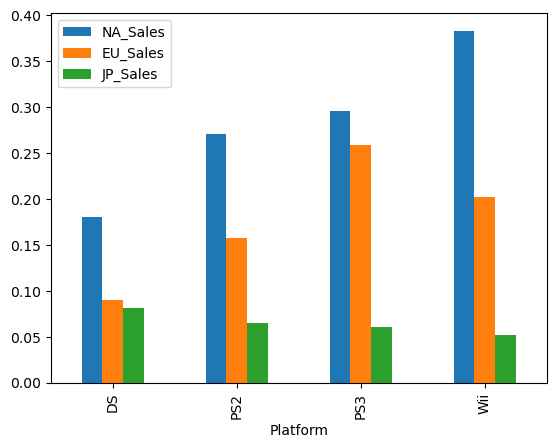

In [18]:
mean_sales.plot.bar()

### 3. Again focusing on the columns that contain sales data, create a table that shows the mean sales for each genre. Make a plot of this data.

Using the main df to create a table that shows the mean sales for each genre helps understand which players are really dominant in the same. It appears that on average, NA_sales dominate in evey genre besides role playing. Role playing seems to be dominated by JP_sales. Otherwise, it is clear that NA is the dominant player, followe by EU then JP. Its worth mentioning that JP seems to be a much closer competitor to the second most dominant player EU. 

In [20]:
mean_sales_genre = df.groupby("Genre")[["NA_Sales", "EU_Sales", "JP_Sales"]].mean()
display(mean_sales_genre)

,NA_Sales,EU_Sales,JP_Sales
Genre,,,
Action,0.264726,0.158323,0.048236
Adventure,0.082271,0.049868,0.040490
Fighting,0.263667,0.119481,0.103007
Misc,0.235906,0.124198,0.061967
Platform,0.504571,0.227573,0.147596
Puzzle,0.212680,0.087251,0.098471
Racing,0.287766,0.190865,0.045388
Role-Playing,0.219946,0.126384,0.236767
Shooter,0.444733,0.239137,0.029221


<Axes: xlabel='Genre'>

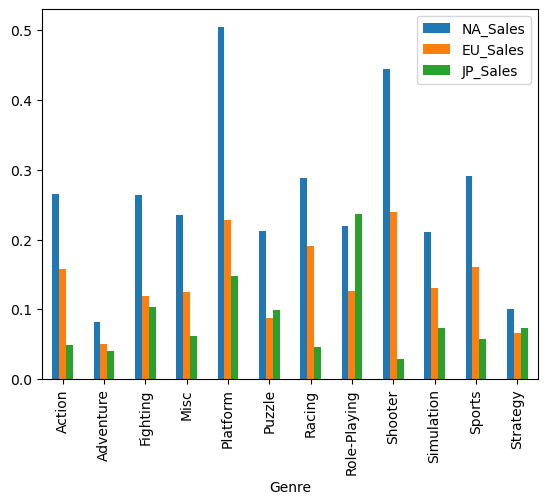

In [22]:
mean_sales_genre.plot.bar()

### 4. Create a table that shows the mean and max sales for each year and for each sales region (NA,EU,JP). From this data make a scatter or line plot that shows how the max sales data changed over the years.

We can see that North Americas's mean sales were greatest in 1989, then dropped sharply after 1990s. EU had a similar trend to NA but they experienced a sharp decline after 1992. EU also experienced a sharp decline in 2014. Japans mean peaked in 1990 and then dropped sharply after that until 1995 where it stabailzied at a mean of 0.1. NA had a much higher mean sales than JP and EU. JP's peak was also much higher than EU's. NA's max sale was highest at around 2005, Japans max sales were highest in 1996, and EU's max sale peaked at 2006. It seems as if 2006 was a great year for EU and NA, but not so much for Japan. Besides these peaks, NA's max sales per year tend to be approximately 10, EU is below 3, and Japan is also around 3.

In [24]:
mean_by_year = df.groupby("Year")[["NA_Sales", "EU_Sales", "JP_Sales"]].mean()
max_by_year = df.groupby("Year")[["NA_Sales", "EU_Sales", "JP_Sales"]].max()

merged_df = pd.merge(mean_by_year, max_by_year, on='Year', how='inner')

merged_df.rename(columns = {'NA_Sales_x' :'NA_Sales_mean',
                           'EU_Sales_x' :'EU_Sales_mean',
                            'JP_Sales_x' :'JP_Sales_mean',
                            'NA_Sales_y' :'NA_Sales_max',
                            'EU_Sales_y' :'EU_Sales_max',
                            'JP_Sales_y' :'JP_Sales_max'},
                            inplace = True)

display(merged_df.head(5))

,NA_Sales_mean,EU_Sales_mean,JP_Sales_mean,NA_Sales_max,EU_Sales_max,JP_Sales_max
Year,,,,,,
1980.0,1.176667,0.074444,0.000000,4.00,0.26,0.00
1981.0,0.726087,0.042609,0.000000,4.21,0.24,0.00
1982.0,0.747778,0.045833,0.000000,7.28,0.45,0.00
1983.0,0.456471,0.047059,0.476471,1.22,0.12,2.35
1984.0,2.377143,0.150000,1.019286,26.93,0.63,2.46


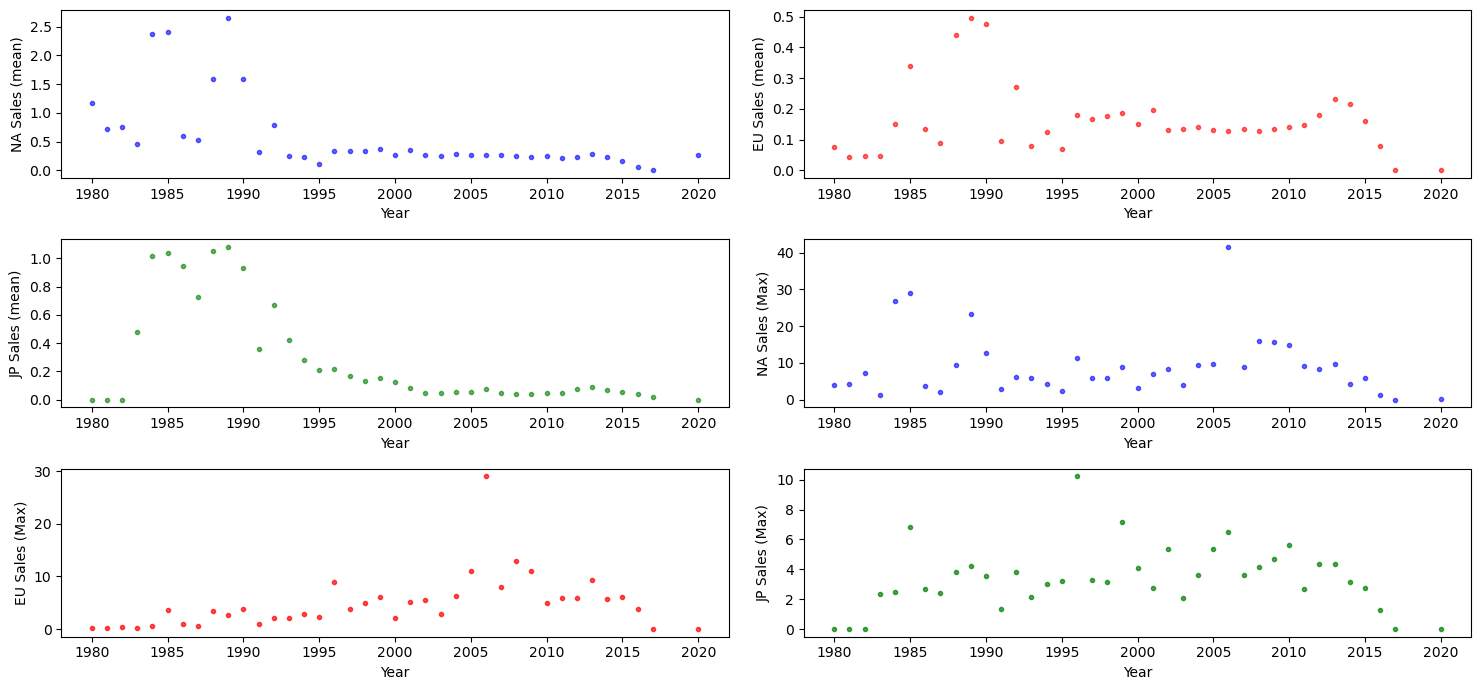

In [26]:
x = merged_df.index 
y = merged_df[['NA_Sales_mean', 'EU_Sales_mean']]

fig = plt.figure(figsize = (15,7))

ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)




ax1.scatter(x,merged_df['NA_Sales_mean'],color='b',marker='.',alpha=.6)
ax2.scatter(x,merged_df['EU_Sales_mean'],color='r',marker='.',alpha=.6)
ax3.scatter(x,merged_df['JP_Sales_mean'],color='g',marker='.',alpha=.6)
ax4.scatter(x,merged_df['NA_Sales_max'],color='b',marker='.',alpha=.6)
ax5.scatter(x,merged_df['EU_Sales_max'],color='r',marker='.',alpha=.7)
ax6.scatter(x,merged_df['JP_Sales_max'],color='g',marker='.',alpha=.7)

ax1.set_xlabel("Year")
ax2.set_xlabel("Year")
ax3.set_xlabel("Year")
ax4.set_xlabel("Year")
ax5.set_xlabel("Year")
ax6.set_xlabel("Year")


ax1.set_ylabel("NA Sales (mean)")
ax2.set_ylabel("EU Sales (mean)")
ax3.set_ylabel("JP Sales (mean)")
ax4.set_ylabel("NA Sales (Max)")
ax5.set_ylabel("EU Sales (Max)")
ax6.set_ylabel("JP Sales (Max)")



plt.tight_layout()
plt.show()